###What is an Efficient Frontier?

An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk. A portfolio is said to be efficient if there is no other portfolio that offers higher returns for a lower or equal amount of risk. Where portfolios are located on the efficient frontier depends on the investor’s degree of risk tolerance.

The efficient frontier is a curved line. It is because every increase in risk results in a relatively smaller amount of returns. In other words, there is a diminishing marginal return to risk, and it results in a curvature.

Diversifying the assets in your portfolio leads to increased returns and decreased risks, which leads to a portfolio that is located on the efficient frontier. Therefore, diversification can create an efficient portfolio that is located on a curved line.

###How Does an Efficient Frontier Work?
It is represented by plotting the expected returns of a portfolio and the standard deviation of returns. The y-axis is made up of the expected returns of the portfolio. The x-axis is labeled as the standard deviation of returns, which is a measure of risk.

A portfolio is then plotted onto the graph according to its expected returns and standard deviation of returns. The portfolio is compared to the efficient frontier. If a portfolio is plotted on the right side of the chart, it indicates that there is a higher level of risk for the given portfolio. If it is plotted low on the graph, the portfolio offers low returns.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
%matplotlib inline

In [ ]:
#P&G and SP500 assts
df = pd.read_csv('Markowitz_Data.csv',parse_dates = ['Date'] ,dtype = {'PG': float, '^GSPC': float})
df.head()

,Date,PG,^GSPC
0,2010-01-04,61.119999,1132.989990
1,2010-01-05,61.139999,1136.520020
2,2010-01-06,60.849998,1137.140015
3,2010-01-07,60.520000,1141.689941
4,2010-01-08,60.439999,1144.979980


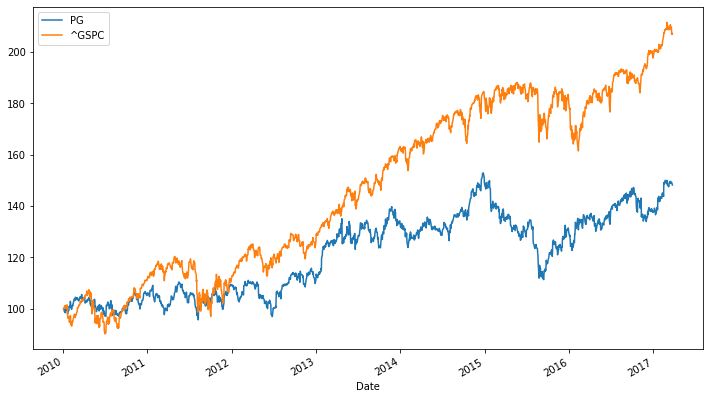

In [ ]:
#Normalized plot -> Return plots
df['PG'] = df['PG']/df['PG'].iloc[0]*100
df['^GSPC'] = df['^GSPC']/df['^GSPC'].iloc[0]*100
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.plot(figsize=(12,7))


In [ ]:
log_returns = np.log(df/df.shift(1))

In [ ]:
log_returns.mean()*250

PG       0.054082
^GSPC    0.099971
dtype: float64

P&G and SP500 showed a solid rate return in the considered time.

In [ ]:
#Covariance
log_returns.cov()*250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [ ]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


The assets are well correlated (>30%)

In [ ]:
num_assets = 2
weigths = np.random.random(num_assets)
weigths /= np.sum(weigths)
weigths.sum()


1.0000000000000002

In [ ]:
weigths

array([0.06719226, 0.93280774])

##Expected Portfolio Attributes
### Portfolio Return

In [ ]:
expected_return = np.sum(weigths * log_returns.mean()) *250
print(f'The expected portfolio return is {expected_return}')

The expected portfolio return is 0.09688774835799743


###Portfolio Variance

In [ ]:
expected_variance = np.dot(weigths.T, np.dot(log_returns.cov() *250, weigths))
print(f'The expected portfolio variance is {expected_variance}')

The expected portfolio variance is 0.02201993426526125


###Portfolio Volatility

In [ ]:
expected_volatility = np.sqrt(expected_variance)
print(f'The expected portfolio variance is {expected_volatility}')

The expected portfolio variance is 0.14839115292112684


#Efficient Frontier

It assumes that assets have a normal distribution.

In [ ]:
# Create two empty list
pf_returns = []
pf_volatilities = []

In [ ]:
# Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append 
# the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

In [ ]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})
portfolios.head()

,Return,Volatility
0,0.080616,0.132511
1,0.077728,0.131393
2,0.064700,0.133395
3,0.089346,0.139146
4,0.069223,0.131396


Text(0, 0.5, 'Expected Return')

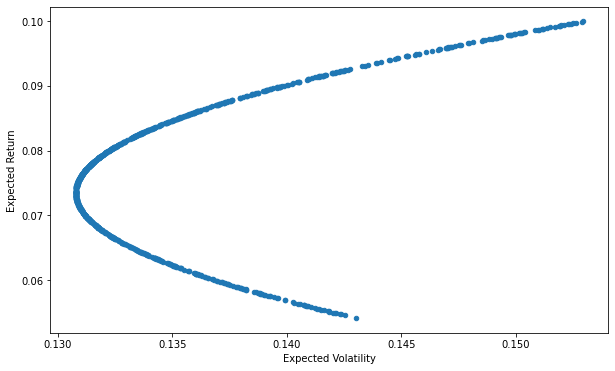

In [ ]:
# Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return.
# Organize your chart well and make sure you have labeled both the x- and the y- axes
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

#Capital Asset Pricing Model

In [ ]:
df.tail()

,PG,^GSPC
Date,,
2017-03-20,149.247386,209.487285
2017-03-21,149.198304,206.887973
2017-03-22,148.871072,207.278967
2017-03-23,148.511123,207.059196
2017-03-24,148.183903,206.884439


In [ ]:
#Last 5 year for Beta determination
df_capital = df.loc['2012-03-24':'2017-03-24']
df_capital.head()


,PG,^GSPC
Date,,
2012-03-26,110.373037,125.024053
2012-03-27,109.865843,124.671889
2012-03-28,109.931288,124.055821
2012-03-29,109.636785,123.856348
2012-03-30,109.964005,124.314423


In [ ]:
sec_returns = np.log(df_capital/df_capital.shift(1))

cov = sec_returns.cov()*250
cov_with_market = cov.iloc[0,1]
cov_with_market

0.0100887474287267

In [ ]:
market_var = sec_returns['^GSPC'].var()*250
market_var

0.016158812059940103

Beta:

In [ ]:
asset_beta = cov_with_market/market_var
print(f'The Beta of P&G asset is {asset_beta}')

The Beta of P&G asset is 0.6243495741706211


**Observation:** Beta is  commonly determined considering a period of 5 years. 

----

##Expected return of stock (CAPM)
**CAPM:** Capital Asset Price Modeling

ri = rf + B* (rm-rf)

- **ri:** Expected security return
- **rf:** Risk free asset
- **rm:** Market return


In [ ]:
#https://www.bloomberg.com/markets/rates-bonds/government-bonds/us
# GT10:GOV 10 Year- Yield- Treasury Yields
rf = 0.0378
ri = rf + asset_beta * 0.05 #estimated parameter

print(f'The expected security return of P&G asset is {round(ri*100,1)}%')

The expected security return of P&G asset is 6.9%


An investor would expect to earn 6.9% to be compensated for the taken risk.

#Sharpe-Ratio

###What Is the Sharpe Ratio?
The Sharpe ratio compares the return of an investment with its risk. 

----
Sharpe-Ratio = ri- rf/sigma,i

- **rf:** Risk free ratio
- **ri:** Rate of return of the sotck "i"
- **Sigma,i:** Standard desviation of stock "i"
- *Expected return* = ri - rf


##What the Sharpe Ratio Can Tell You?
The Sharpe ratio is one of the most widely used methods for measuring risk-adjusted relative returns. It compares a fund's historical or projected returns relative to an investment benchmark with the historical or expected variability of such returns.

The risk-free rate was initially used in the formula to denote an investor's hypothetical minimal borrowing costs.

More generally, it represents the risk premium of an investment versus a safe asset such as a Treasury bill or bond.

When benchmarked against the returns of an industry sector or investing strategy, the Sharpe ratio provides a measure of risk-adjusted performance not attributable to such affiliations.

The ratio is useful in determining to what degree excess historical returns were accompanied by excess volatility. While excess returns are measured in comparison with an investing benchmark, the standard deviation formula gauges volatility based on the variance of returns from their mean.

The ratio's utility relies on the assumption that the historical record of relative risk-adjusted returns has at least some predictive value.

In [ ]:
sharpe = (asset_beta *0.05) / (sec_returns['PG'].std() * 250 ** 0.5)
print(f'The Sharpe Ratio of P&G asset is {round(sharpe*100,1)}%')

The Sharpe Ratio of P&G asset is 21.6%
